# Working with timeseries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('neic_new.csv', parse_dates=['time'], index_col=0).tz_localize(None)
df.head(10)

,latitude,longitude,depth,mag,place
time,,,,,
1973-01-01 11:42:37.500,-35.513,-16.211,33.0,6.0,southern Mid-Atlantic Ridge
1973-01-05 13:54:29.100,-38.997,175.232,150.0,6.2,North Island of New Zealand
1973-01-06 15:52:41.900,-14.665,166.384,36.0,6.1,Vanuatu
1973-01-18 09:28:14.100,-6.868,149.993,43.0,6.8,"New Britain region, Papua New Guinea"
1973-01-22 00:37:58.000,18.601,-104.967,33.0,6.1,"offshore Jalisco, Mexico"
1973-01-27 13:08:43.700,-0.115,123.931,55.0,6.0,"Sulawesi, Indonesia"
1973-01-30 21:01:12.500,18.481,-102.996,43.0,7.5,"Michoacan, Mexico"
1973-01-31 20:55:53.100,28.206,139.227,498.0,6.0,"Bonin Islands, Japan region"
1973-02-01 05:14:20.600,-22.655,-66.195,229.0,6.1,"Jujuy, Argentina"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6017 entries, 1973-01-01 11:42:37.500000 to 2015-11-11 02:46:19.900000
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   6017 non-null   float64
 1   longitude  6017 non-null   float64
 2   depth      6017 non-null   float64
 3   mag        6017 non-null   float64
 4   place      6016 non-null   object 
dtypes: float64(4), object(1)
memory usage: 282.0+ KB


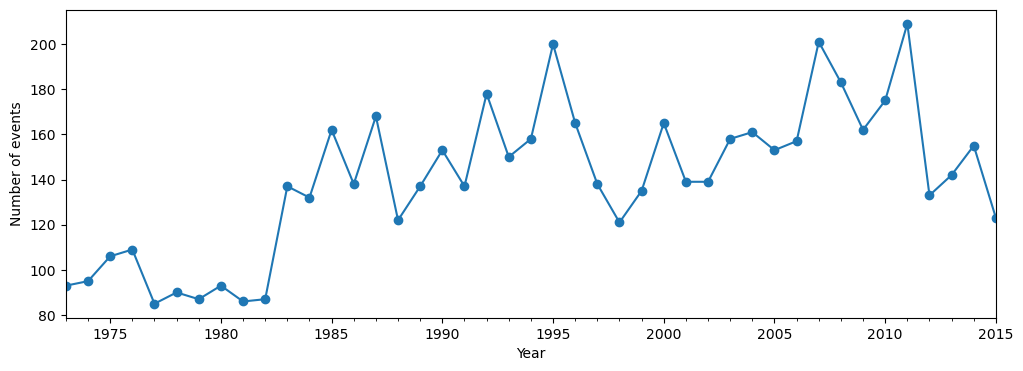

In [4]:
df.resample('Y').size().plot(marker='o', figsize=(12,4))
plt.xlabel('Year')
plt.ylabel('Number of events');

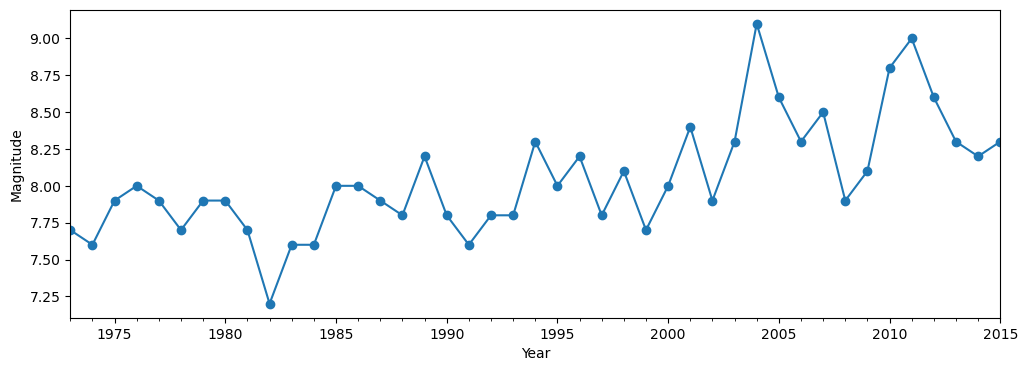

In [5]:
df['mag'].resample('Y').max().plot(marker='o', figsize=(12,4))
plt.xlabel('Year')
plt.ylabel('Magnitude');

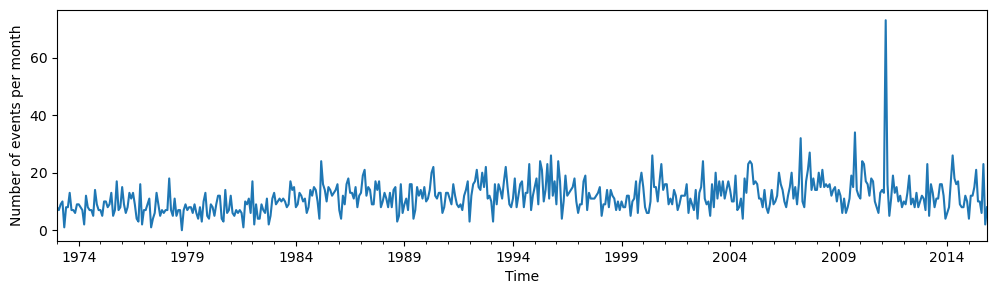

In [6]:
df['mag'].resample('M').count().plot(figsize=(12, 3))
plt.xlabel('Time')
plt.ylabel('Number of events per month');

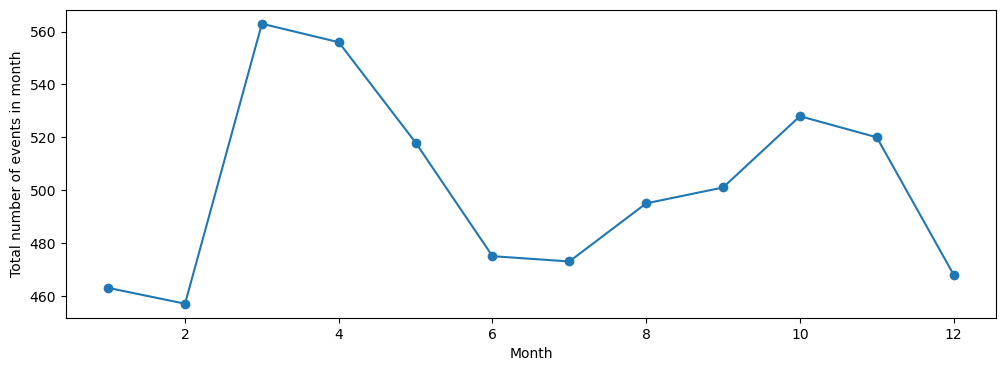

In [7]:
df.groupby(df.index.month).size().plot(marker='o', figsize=(12,4))
plt.xlabel('Month')
plt.ylabel('Total number of events in month');

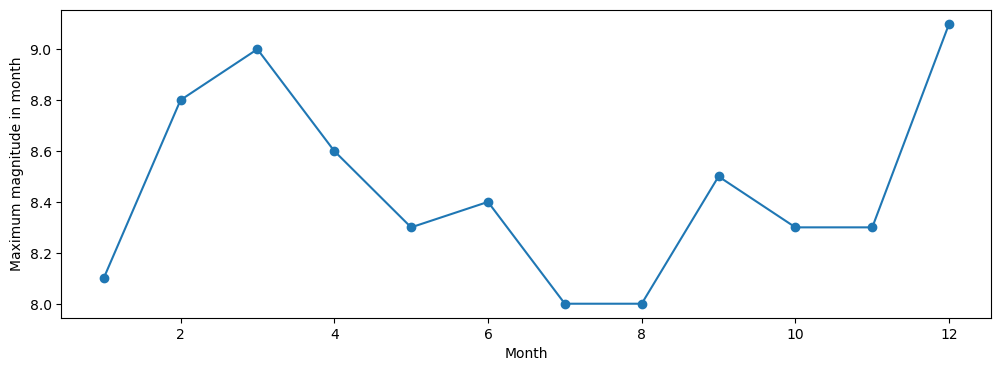

In [8]:
df['mag'].groupby(df.index.month).max().plot(marker='o', figsize=(12,4))
plt.xlabel('Month')
plt.ylabel('Maximum magnitude in month');